# <U>Predictive Modeling for Liver Disease Detection</U>
## Step 1: Problem Definition

This project develops a simple tool using common health data to predict liver disease early, helping doctors provide faster and better care.
Liver disease often goes unnoticed until it becomes serious, as early symptoms are mild or absent. Diagnosing it quickly is challenging, especially where medical resources are limited.This project aims to develop a simple program that uses common health data—like age, weight, alcohol use, family history, and blood tests—to predict the risk of liver disease.The tool will help doctors detect liver problems early, enabling faster treatment, saving time and resources, and improving patient care.

This project aims to develop a machine learning model that predicts the presence of liver disease in patients based on various medical attributes such as age, gender, BMI, alcohol consumption, smoking status, genetic risk, physical activity, diabetes, hypertension, and liver function test results. Utilizing the https://www.kaggle.com/datasets/rabieelkharoua/predict-liver-disease-1700-records-dataset/data Dataset, we will train, evaluate, and interpret models to assist in clinical decision-making.


### Why This Is Important:

- **Detect Early:** Find signs of liver disease before symptoms appear.  
- **Save Lives:** Early treatment can stop the disease from getting worse.  
- **Save Money:** Reduce expensive tests and hospital visits.  
- **Help Doctors:** Provide support to doctors, especially when they have limited time or resources.  
- **Reach Everyone:** Make liver disease detection easier in places with fewer medical facilities.


### How This Can Be Used:

- Quickly identify patients who need more tests or care.  
- Support doctors with clear, easy-to-understand risk predictions.  
- Help prioritize patients based on how likely they are to have liver disease.  
- Show which lifestyle habits or test results matter most for liver health.  
- Be used in clinics, hospitals, and remote healthcare centers.


This project aims to make liver disease detection easier, faster, and more reliable, so more people get help early and stay healthier.


# Adding Necessary Libraries For The Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay, classification_report, roc_curve,RocCurveDisplay,auc,roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score
import warnings 
warnings.filterwarnings('ignore')

## Step 2: Data Understanding 

##### Loading and Analyzing the Data

### Understanding the Dataset Columns
| **Column Name**        | **What It Means**                              |
|------------------------|------------------------------------------------|
| `Age`                  | How old the person is (20 to 80 years)          |
| `Gender`               | Male (0) or Female (1)                           |
| `BMI`                  | Body weight and height ratio (15 to 40)         |
| `AlcoholConsumption`   | How much alcohol the person drinks each week    |
| `Smoking`              | Does the person smoke? No (0) or Yes (1)        |
| `GeneticRisk`          | Family risk for liver disease: Low (0), Medium (1), High (2) |
| `PhysicalActivity`     | Hours of exercise per week (0 to 10)             |
| `Diabetes`             | Does the person have diabetes? No (0), Yes (1)  |
| `Hypertension`         | Does the person have high blood pressure? No (0), Yes (1) |
| `LiverFunctionTest`    | Liver health test score (20 to 100)              |
| `Diagnosis`            | Liver disease: No (0), Yes (1)                   |



In [2]:
df = pd.read_csv('Liver_disease_data.csv')
df.head()

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
0,58,0,35.857584,17.272828,0,1,0.658940,0,0,42.734240,1
1,71,1,30.732470,2.201266,0,1,1.670557,1,0,67.309822,1
2,48,0,19.971407,18.500944,0,0,9.928308,0,0,63.738956,0
3,34,1,16.615417,12.632870,0,0,5.630129,0,0,64.555873,1
4,62,1,16.065830,1.087815,0,1,3.566218,1,0,77.868689,1


##### <U> Dataset Shape </U>

To check the number of rows and columns in the dataset, use the `.shape` property:

In [3]:
df.shape

(1700, 11)

##### <u> Checking for Missing Values  </u>

In [4]:
df.isnull().sum()

Age                   0
Gender                0
BMI                   0
AlcoholConsumption    0
Smoking               0
GeneticRisk           0
PhysicalActivity      0
Diabetes              0
Hypertension          0
LiverFunctionTest     0
Diagnosis             0
dtype: int64

##### <u> Checking for Duplicate Values  </u>

In [5]:
df.duplicated().sum()

np.int64(0)

#####  Dataset Summary:

Use the following command to generate a statistical summary of all **numerical features**:

In [6]:
df.describe()

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,50.394118,0.504118,27.699801,9.832309,0.291765,0.521765,5.000993,0.142353,0.154706,59.863867,0.550588
std,17.641915,0.500130,7.210400,5.757472,0.454708,0.666262,2.847074,0.349515,0.361730,22.996262,0.497581
min,20.000000,0.000000,15.004710,0.003731,0.000000,0.000000,0.001852,0.000000,0.000000,20.019254,0.000000
25%,35.000000,0.000000,21.455414,4.841811,0.000000,0.000000,2.622121,0.000000,0.000000,40.024216,0.000000
50%,51.000000,1.000000,27.925367,9.828195,0.000000,0.000000,5.022883,0.000000,0.000000,59.513146,1.000000
75%,66.000000,1.000000,33.957668,14.871671,1.000000,1.000000,7.401642,0.000000,0.000000,79.428755,1.000000
max,80.000000,1.000000,39.992845,19.952456,1.000000,2.000000,9.994964,1.000000,1.000000,99.991413,1.000000


##### Quick Data Overview:

Use the follwing command  to see a quick summary of your dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1700 non-null   int64  
 1   Gender              1700 non-null   int64  
 2   BMI                 1700 non-null   float64
 3   AlcoholConsumption  1700 non-null   float64
 4   Smoking             1700 non-null   int64  
 5   GeneticRisk         1700 non-null   int64  
 6   PhysicalActivity    1700 non-null   float64
 7   Diabetes            1700 non-null   int64  
 8   Hypertension        1700 non-null   int64  
 9   LiverFunctionTest   1700 non-null   float64
 10  Diagnosis           1700 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 146.2 KB


##### <U> Dataset Features </U>
The dataset includes numeric and categorical features to predict liver disease.

In [8]:
continuous_features = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'LiverFunctionTest']
categorical_features = ['Gender', 'Smoking', 'GeneticRisk', 'Diabetes', 'Hypertension']
target = ['Diagnosis']

In [9]:
df[categorical_features].nunique()

Gender          2
Smoking         2
GeneticRisk     3
Diabetes        2
Hypertension    2
dtype: int64

#### Data Understanding Observations

- **Dataset Size:** Contains 1700 records and 11 features, which is sufficient for analysis and modeling.

- **No Missing Values:** All features, including the target, have complete data with no missing values, so no data imputation is necessary.

- **No Duplicate Records:** The dataset does not contain any duplicate rows, ensuring data quality and integrity.

- **Feature Types:**  
  - Continuous features: Age, BMI, AlcoholConsumption, PhysicalActivity, LiverFunctionTest  
  - Categorical features: Gender, Smoking, GeneticRisk, Diabetes, Hypertension

- **Categorical Features:** Most categorical features are binary with 2 unique categories, except GeneticRisk which has 3 categories (low, medium, high).

- **Target Variable:** Diagnosis is binary, representing presence (1) or absence (0) of liver disease.

- **Overall Data Quality:** The dataset is clean, well-structured, and ready for the next steps of preprocessing and model building.


## Step 3: Exploratory Data Analysis (EDA)

##### <U>Visualize Distributions of Continuous Variables</U>

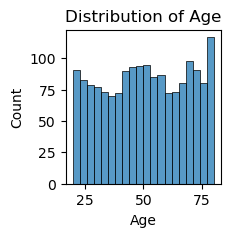

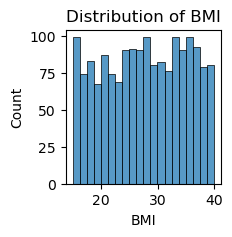

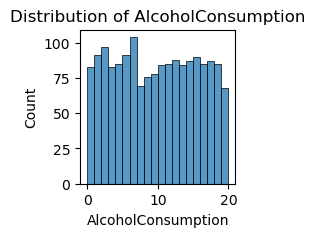

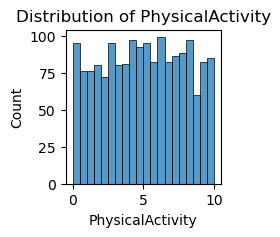

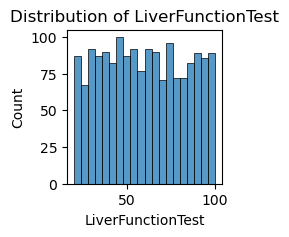

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

for feature in continuous_features:
    plt.figure(figsize=(2, 2))      
    sns.histplot(df[feature], bins=20, stat="count")
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

##### <U>Visualize Categorical Variables</U>

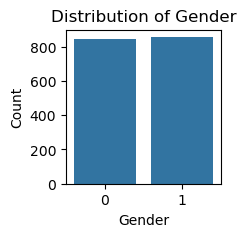

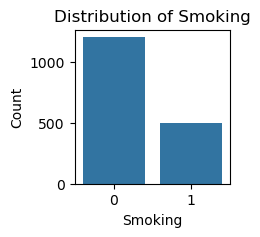

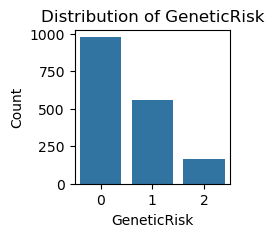

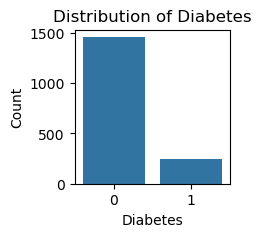

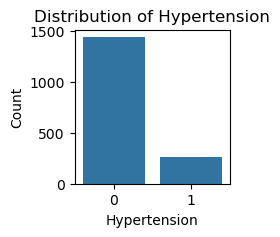

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

for feature in categorical_features:
    plt.figure(figsize=(2, 2))     
    sns.countplot(x=df[feature])
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

In [12]:
from IPython.display import display, Markdown
for x in categorical_features:
    display(Markdown(f"###### Total count for {x} ######"))   
    print(df[x].value_counts())

###### Total count for Gender ######

Gender
1    857
0    843
Name: count, dtype: int64


###### Total count for Smoking ######

Smoking
0    1204
1     496
Name: count, dtype: int64


###### Total count for GeneticRisk ######

GeneticRisk
0    978
1    557
2    165
Name: count, dtype: int64


###### Total count for Diabetes ######

Diabetes
0    1458
1     242
Name: count, dtype: int64


###### Total count for Hypertension ######

Hypertension
0    1437
1     263
Name: count, dtype: int64


##### <U>Analyze Target Variable</U>

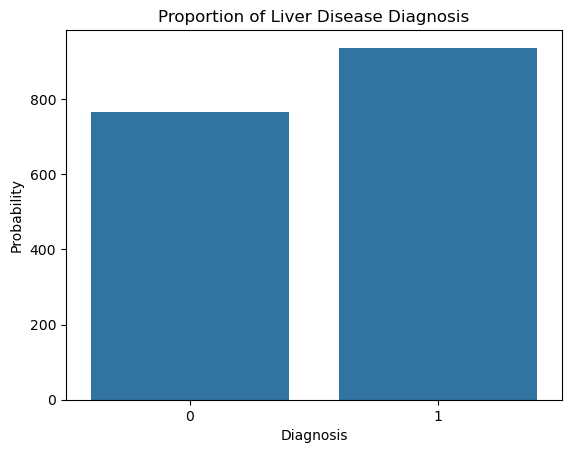

In [13]:
sns.countplot(x='Diagnosis', data=df, stat='count')
plt.title('Proportion of Liver Disease Diagnosis')  
plt.ylabel('Probability')
plt.show()

In [14]:
df["Diagnosis"].value_counts()

Diagnosis
1    936
0    764
Name: count, dtype: int64

##### <U>Correlation Analysis</U>

Correlation heatmap for continuous variables.
Check if any features are highly correlated (multicollinearity).

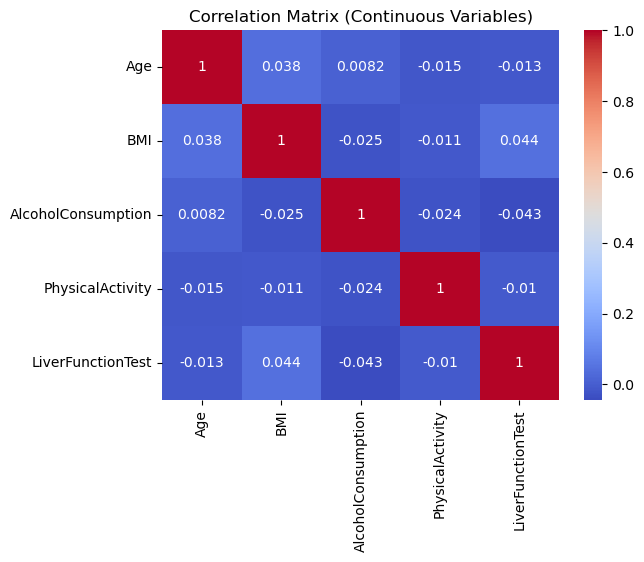

In [15]:
plt.title('Correlation Matrix (Continuous Variables)')
sns.heatmap(df[continuous_features].corr(), annot=True, cmap='coolwarm')
plt.show()

### Observations: Correlation Between Continuous Variables
We checked correlation between continuous features only.
### Important Correlation Values:
- **BMI vs LiverFunctionTest** → **+0.044** (highest, but still very weak)
- **AlcoholConsumption vs LiverFunctionTest** → **–0.043**
- **Age vs BMI** → **+0.038**
- All values are very small → no strong relation.
- So, we can use all features together no multicollinearity exists.

### Step 4 : Data Wrangling

#### <U>(4a)Checking For Skewness</U>
      Skewness shows whether the data is symmetrical, left-skewed, or right-skewed.
       Conditions for Skewness

| Skewness Value   | Interpretation                     |
|------------------|-------------------------------------|
| 0                | Perfectly symmetrical               |
| > 0              | Right-skewed (tail on the right)    |
| < 0              | Left-skewed (tail on the left)      |
| -0.5 to +0.5     | Fairly symmetrical                  |
| -1 to -0.5       | Moderate left skew                  |
| +0.5 to +1       | Moderate right skew                 |
| < -1 or > +1     | Highly skewed (needs transformation) |


In [16]:
df.skew()

Age                  -0.040808
Gender               -0.016486
BMI                  -0.071939
AlcoholConsumption    0.018232
Smoking               0.916986
GeneticRisk           0.906531
PhysicalActivity     -0.023409
Diabetes              2.048946
Hypertension          1.911372
LiverFunctionTest     0.040151
Diagnosis            -0.203576
dtype: float64

##### Apply The BoxCox for Highly skewed column ie.Diabetes and Hypertension 

In [17]:
from scipy.stats import boxcox
cols_for_boxcox = ['Diabetes', 'Hypertension']
for col in cols_for_boxcox:
    if (df[col] <= 0).any():
        print(f"Skipping {col} — contains zero or negative values.")
        continue
    df[col], _ = boxcox(df[col])
    print(f"Applied Box-Cox on {col}.")

Skipping Diabetes — contains zero or negative values.
Skipping Hypertension — contains zero or negative values.


In [18]:
df.skew()

Age                  -0.040808
Gender               -0.016486
BMI                  -0.071939
AlcoholConsumption    0.018232
Smoking               0.916986
GeneticRisk           0.906531
PhysicalActivity     -0.023409
Diabetes              2.048946
Hypertension          1.911372
LiverFunctionTest     0.040151
Diagnosis            -0.203576
dtype: float64

#### <U>(4b)Note: Here Encoding Is Not Required because all columns have numerical values</U> 

#### <U>(4C).Scaling</U>

- Scaling means changing big numbers into smaller ones so that all the features in the data are on a similar scale.  
- This is important because machines sometimes treat bigger numbers as more important.  
- If one feature has large values and another has small values, the model might focus more on the big ones.  
- To avoid this, we scale the data so that all features are treated equally.  
- Scaling should only be used on continuous data (like age, bmi,AlcoholConsumption and so on.)not on data with fixed categories or small whole numbers.
- If we apply scaling before splliting it will cause data leakage so apply during train test split 

In [19]:
df.columns

Index(['Age', 'Gender', 'BMI', 'AlcoholConsumption', 'Smoking', 'GeneticRisk',
       'PhysicalActivity', 'Diabetes', 'Hypertension', 'LiverFunctionTest',
       'Diagnosis'],
      dtype='object')

### Step 5: Modelling

In [20]:
X = df.drop(columns=['Diagnosis']) # Independent variables 
y = df['Diagnosis'] # Target Variable

In [21]:
X

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest
0,58,0,35.857584,17.272828,0,1,0.658940,0,0,42.734240
1,71,1,30.732470,2.201266,0,1,1.670557,1,0,67.309822
2,48,0,19.971407,18.500944,0,0,9.928308,0,0,63.738956
3,34,1,16.615417,12.632870,0,0,5.630129,0,0,64.555873
4,62,1,16.065830,1.087815,0,1,3.566218,1,0,77.868689
...,...,...,...,...,...,...,...,...,...,...
1695,42,0,38.498295,14.384688,0,1,0.992289,0,0,97.933961
1696,40,0,27.600094,5.431009,0,0,8.390492,0,0,70.260528
1697,38,0,38.730017,6.324302,1,2,9.314222,0,1,56.053370
1698,67,0,35.820798,16.899417,0,2,3.224453,0,0,26.300875


In [22]:
y

0       1
1       1
2       0
3       1
4       1
       ..
1695    1
1696    1
1697    1
1698    1
1699    1
Name: Diagnosis, Length: 1700, dtype: int64

We are splitting the dataset into:

- **80% training data**
- **20% testing data**

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.8,random_state=42)

In [24]:
columns_to_scale = ['Age', 'BMI', 'AlcoholConsumption', 'GeneticRisk', 'PhysicalActivity', 'LiverFunctionTest']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a copy so original data is safe
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
# Initialize the scaler
scaler = StandardScaler()   # important for joblib (varname)
# Fit on training data and transform both train and test
X_train_scaled[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test_scaled[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

In [25]:
#------Creating a DataFrame that stores all the metrics and performance of each model which will help in Model Selection----------------
algorithms = ['logistic_Model', 'knn_Model', 'svm_Model', 'dt_Model', 'rf_Model', 'ada_Model', 'gb_Model', 'xg_Model']
metrics = ['TrainAccuracy', 'TestAccuracy', 'TrainPrecision', 'TestPrecision','TrainRecall', 'TestRecall',
          'TrainF1', 'TestF1', 'CV']

analysis_df = pd.DataFrame(index=algorithms, columns=metrics)

In [26]:
#-----DataFrame to store metrics useful for further analysis and Model Selection-------------------------
analysis_df

,TrainAccuracy,TestAccuracy,TrainPrecision,TestPrecision,TrainRecall,TestRecall,TrainF1,TestF1,CV
logistic_Model,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
knn_Model,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
svm_Model,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dt_Model,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rf_Model,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ada_Model,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gb_Model,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xg_Model,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
#---Function that calculates all the metrics and Classification report and updatas values in the analysis_df DataFrame--------------------
def model_performance(model_key, model_obj, X_train, y_train, X_test, y_test, analysis_df):
    y_train_pred = model_obj.predict(X_train)
    y_test_pred = model_obj.predict(X_test)

    
    analysis_df.loc[model_key, 'TrainAccuracy'] = accuracy_score(y_train, y_train_pred)
    analysis_df.loc[model_key, 'TestAccuracy'] = accuracy_score(y_test, y_test_pred)
    analysis_df.loc[model_key, 'TrainPrecision'] = precision_score(y_train, y_train_pred)
    analysis_df.loc[model_key, 'TestPrecision'] = precision_score(y_test, y_test_pred)
    analysis_df.loc[model_key, 'TrainRecall'] = recall_score(y_train, y_train_pred)
    analysis_df.loc[model_key, 'TestRecall'] = recall_score(y_test, y_test_pred)
    analysis_df.loc[model_key, 'TrainF1'] = f1_score(y_train, y_train_pred)
    analysis_df.loc[model_key, 'TestF1'] = f1_score(y_test, y_test_pred)

    cv_score = cross_val_score(model_obj, X_train, y_train, cv=5, scoring='accuracy').mean()
    analysis_df.loc[model_key, 'CV'] = cv_score

    print(f'📘 Classification Report — {model_key} (Train)')
    print(classification_report(y_train, y_train_pred))
    print(f'📘 Classification Report — {model_key} (Test)')
    print(classification_report(y_test, y_test_pred))

    # Confusion Matrix - Train
    cm_train = confusion_matrix(y_train, y_train_pred)
    disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
    disp_train.plot(cmap='Reds')
    plt.title(f'{model_key} — Confusion Matrix (Train)')
    plt.show()

    # Confusion Matrix - Test
    cm_test = confusion_matrix(y_test, y_test_pred)
    disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
    disp_test.plot(cmap='Greens')
    plt.title(f'{model_key} — Confusion Matrix (Test)')
    plt.show()
    

    return analysis_df

# LOGISTIC REGRESSION 

#### <U> Modelling</U>
Logistic Regression(Base Line Model)>>>>>>>>>>>>>>>>>> 1st model

In [28]:
from sklearn.linear_model import LogisticRegression
Lr= LogisticRegression()
Lr.fit(X_train_scaled,y_train)

LogisticRegression()

In [29]:
Lr.coef_

array([[ 0.53261997,  1.21574022,  0.59059964,  1.3628255 ,  1.69515276,
         0.42220957, -0.39203883,  0.93703769,  1.45160119,  1.24841574]])

In [30]:
Lr.intercept_

array([-1.00791307])

In [31]:
s1=pd.DataFrame(Lr.predict_proba(X_train_scaled))
s1.drop(columns=[0],inplace=True)
s1

,1
0,0.026075
1,0.591947
2,0.066010
3,0.067497
4,0.328862
...,...
1355,0.707397
1356,0.041002
1357,0.577648
1358,0.066515


In [32]:
Lr.predict(X_train_scaled)

array([0, 1, 0, ..., 1, 0, 1])

In [33]:
Lr.predict_proba(X_train_scaled)

array([[0.97392461, 0.02607539],
       [0.40805257, 0.59194743],
       [0.93399013, 0.06600987],
       ...,
       [0.42235185, 0.57764815],
       [0.93348453, 0.06651547],
       [0.02213448, 0.97786552]])

#### ***Evaluation***

In [34]:
ypred_train = Lr.predict((X_train_scaled))
print("TRAIN ACCURACY ",accuracy_score(y_train,ypred_train))
print("THE CV SCORE(accuracy  of model)",cross_val_score(Lr,X_train_scaled,y_train,cv=5,scoring="accuracy").mean())
ypred_test= Lr.predict(X_test_scaled)
print("TEST ACCURACY ",accuracy_score(y_test,ypred_test))

TRAIN ACCURACY  0.8323529411764706
THE CV SCORE(accuracy  of model) 0.8286764705882353
TEST ACCURACY  0.8088235294117647


📘 Classification Report — logistic_Model (Train)
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       602
           1       0.84      0.86      0.85       758

    accuracy                           0.83      1360
   macro avg       0.83      0.83      0.83      1360
weighted avg       0.83      0.83      0.83      1360

📘 Classification Report — logistic_Model (Test)
              precision    recall  f1-score   support

           0       0.83      0.76      0.79       162
           1       0.80      0.85      0.82       178

    accuracy                           0.81       340
   macro avg       0.81      0.81      0.81       340
weighted avg       0.81      0.81      0.81       340



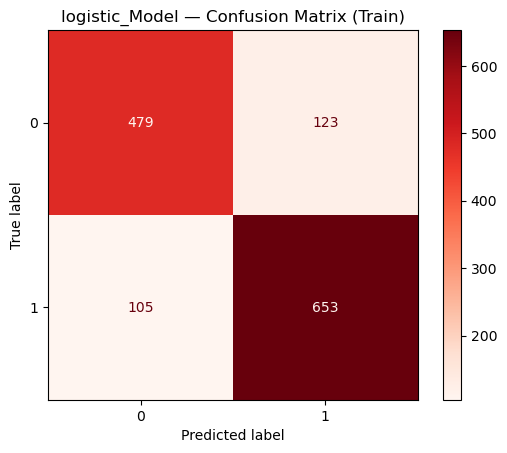

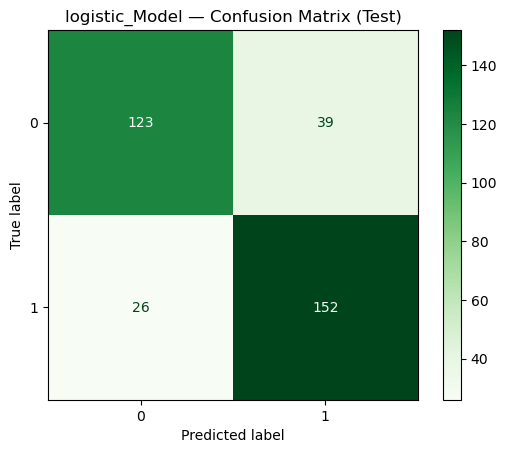

In [35]:
logistic_Model_Report = model_performance('logistic_Model', Lr, X_train_scaled, y_train, X_test_scaled, y_test, analysis_df)

# KNN CLASSIFIER 

#### <U> Modelling</U>

In [36]:
from sklearn.neighbors import KNeighborsClassifier
estimator= KNeighborsClassifier()
param_grid={"n_neighbors": list(range(1,100))}
from sklearn.model_selection import GridSearchCV
cv_classifier=GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
cv_classifier.fit(X_train_scaled,y_train)
cv_classifier.best_params_

{'n_neighbors': 9}

#### ***Evaluation***

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled,y_train)
ypred_train = knn.predict(X_train_scaled)
print("TRAIN ACCURACY ",accuracy_score(y_train,ypred_train))
print("THE CV SCORE(accuracy  of model)",cross_val_score(knn,X_train_scaled,y_train,cv=5,scoring="accuracy").mean())
ypred_test= knn.predict(X_test_scaled)
print("TEST ACCURACY ",accuracy_score(y_test,ypred_test))

TRAIN ACCURACY  0.8801470588235294
THE CV SCORE(accuracy  of model) 0.8191176470588235
TEST ACCURACY  0.8058823529411765


📘 Classification Report — knn_Model (Train)
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       602
           1       0.91      0.87      0.89       758

    accuracy                           0.88      1360
   macro avg       0.88      0.88      0.88      1360
weighted avg       0.88      0.88      0.88      1360

📘 Classification Report — knn_Model (Test)
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       162
           1       0.83      0.79      0.81       178

    accuracy                           0.81       340
   macro avg       0.81      0.81      0.81       340
weighted avg       0.81      0.81      0.81       340



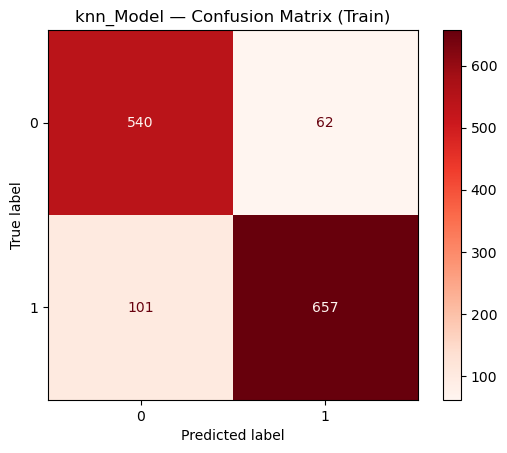

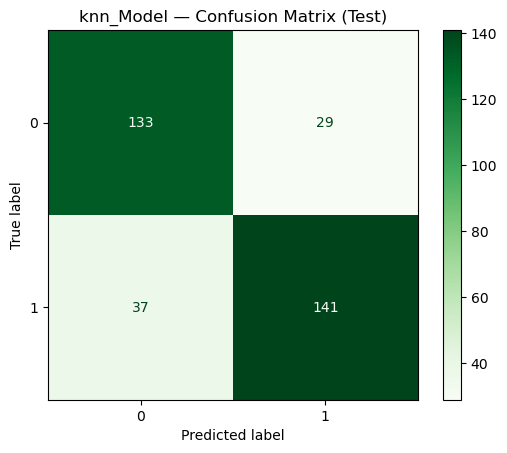

In [38]:
knn_Model_Report = model_performance('knn_Model', knn, X_train_scaled, y_train, X_test_scaled, y_test, analysis_df)

# SUPPORT VECTOR MACHINE 

#### <U> Modelling</U>

#####  FIRST TRY WITHDEFAULT PARAMS 

In [39]:
from sklearn.svm import SVC
svm = SVC(C=1,kernel="rbf")
svm.fit(X_train_scaled, y_train)
ypred_train = svm.predict(X_train_scaled)
print("TRAIN ACCURACY ",accuracy_score(y_train,ypred_train))
print("THE CV SCORE(accuracy  of model)",cross_val_score(svm,X_train_scaled,y_train,cv=5,scoring="accuracy").mean())
ypred_test= svm.predict(X_test_scaled)
print("TEST ACCURACY",accuracy_score(y_test,ypred_test))    # Default value of c is 1 and kernel is rbf

TRAIN ACCURACY  0.8852941176470588
THE CV SCORE(accuracy  of model) 0.8522058823529411
TEST ACCURACY 0.8823529411764706


#### Hyperparameter Tuning For Svm Classifier

In [40]:
from sklearn.model_selection import GridSearchCV
estimator= SVC()
param_grid={"C":  [0.001, 0.01, 0.1, 1, 10, 100],"kernel":["linear","rbf","sigmoid","poly"]}
grid=GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
grid.fit(X_train_scaled,y_train)
grid.best_params_                                                   

{'C': 1, 'kernel': 'rbf'}

### Apply The SVM WITH BEST PARAMETERS

In [41]:
svm = SVC(C=1,kernel="rbf")
svm.fit(X_train_scaled, y_train)
ypred_train = svm.predict(X_train_scaled)
print("TRAIN ACCURACY ",accuracy_score(y_train,ypred_train))
print("THE CV SCORE(accuracy  of model)",cross_val_score(svm,X_train_scaled,y_train,cv=5,scoring="accuracy").mean())
ypred_test= svm.predict(X_test_scaled)
print("TEST ACCURACY",accuracy_score(y_test,ypred_test))

TRAIN ACCURACY  0.8852941176470588
THE CV SCORE(accuracy  of model) 0.8522058823529411
TEST ACCURACY 0.8823529411764706


📘 Classification Report — svm_Model (Train)
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       602
           1       0.89      0.91      0.90       758

    accuracy                           0.89      1360
   macro avg       0.88      0.88      0.88      1360
weighted avg       0.89      0.89      0.89      1360

📘 Classification Report — svm_Model (Test)
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       162
           1       0.86      0.93      0.89       178

    accuracy                           0.88       340
   macro avg       0.89      0.88      0.88       340
weighted avg       0.89      0.88      0.88       340



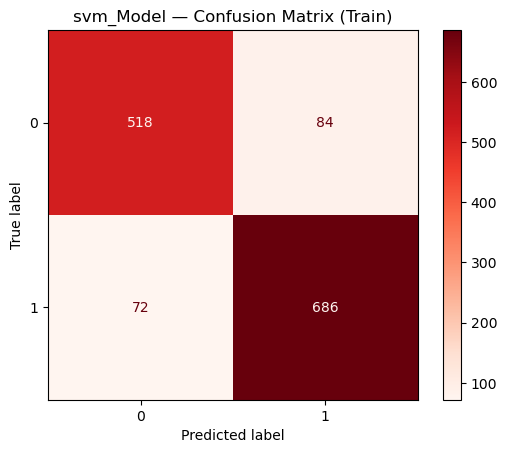

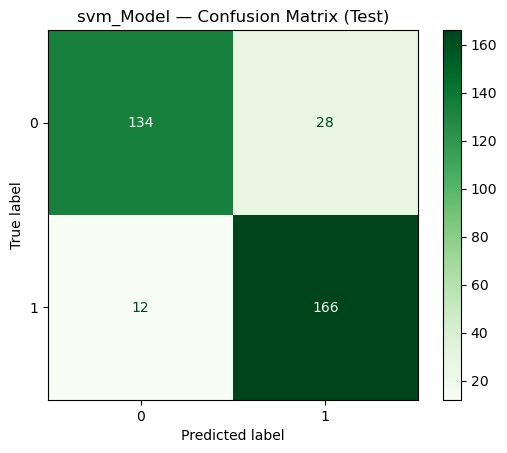

In [42]:
svm_Model_Report = model_performance('svm_Model', svm, X_train_scaled, y_train, X_test_scaled, y_test, analysis_df)

# DECISION TREE 

#### <U> Modelling</U>

######  FIRST TRY WITHDEFAULT PARAMS 

In [43]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)               #while splliting it will calulate the gini value and considers best gini value 

DecisionTreeClassifier(random_state=42)

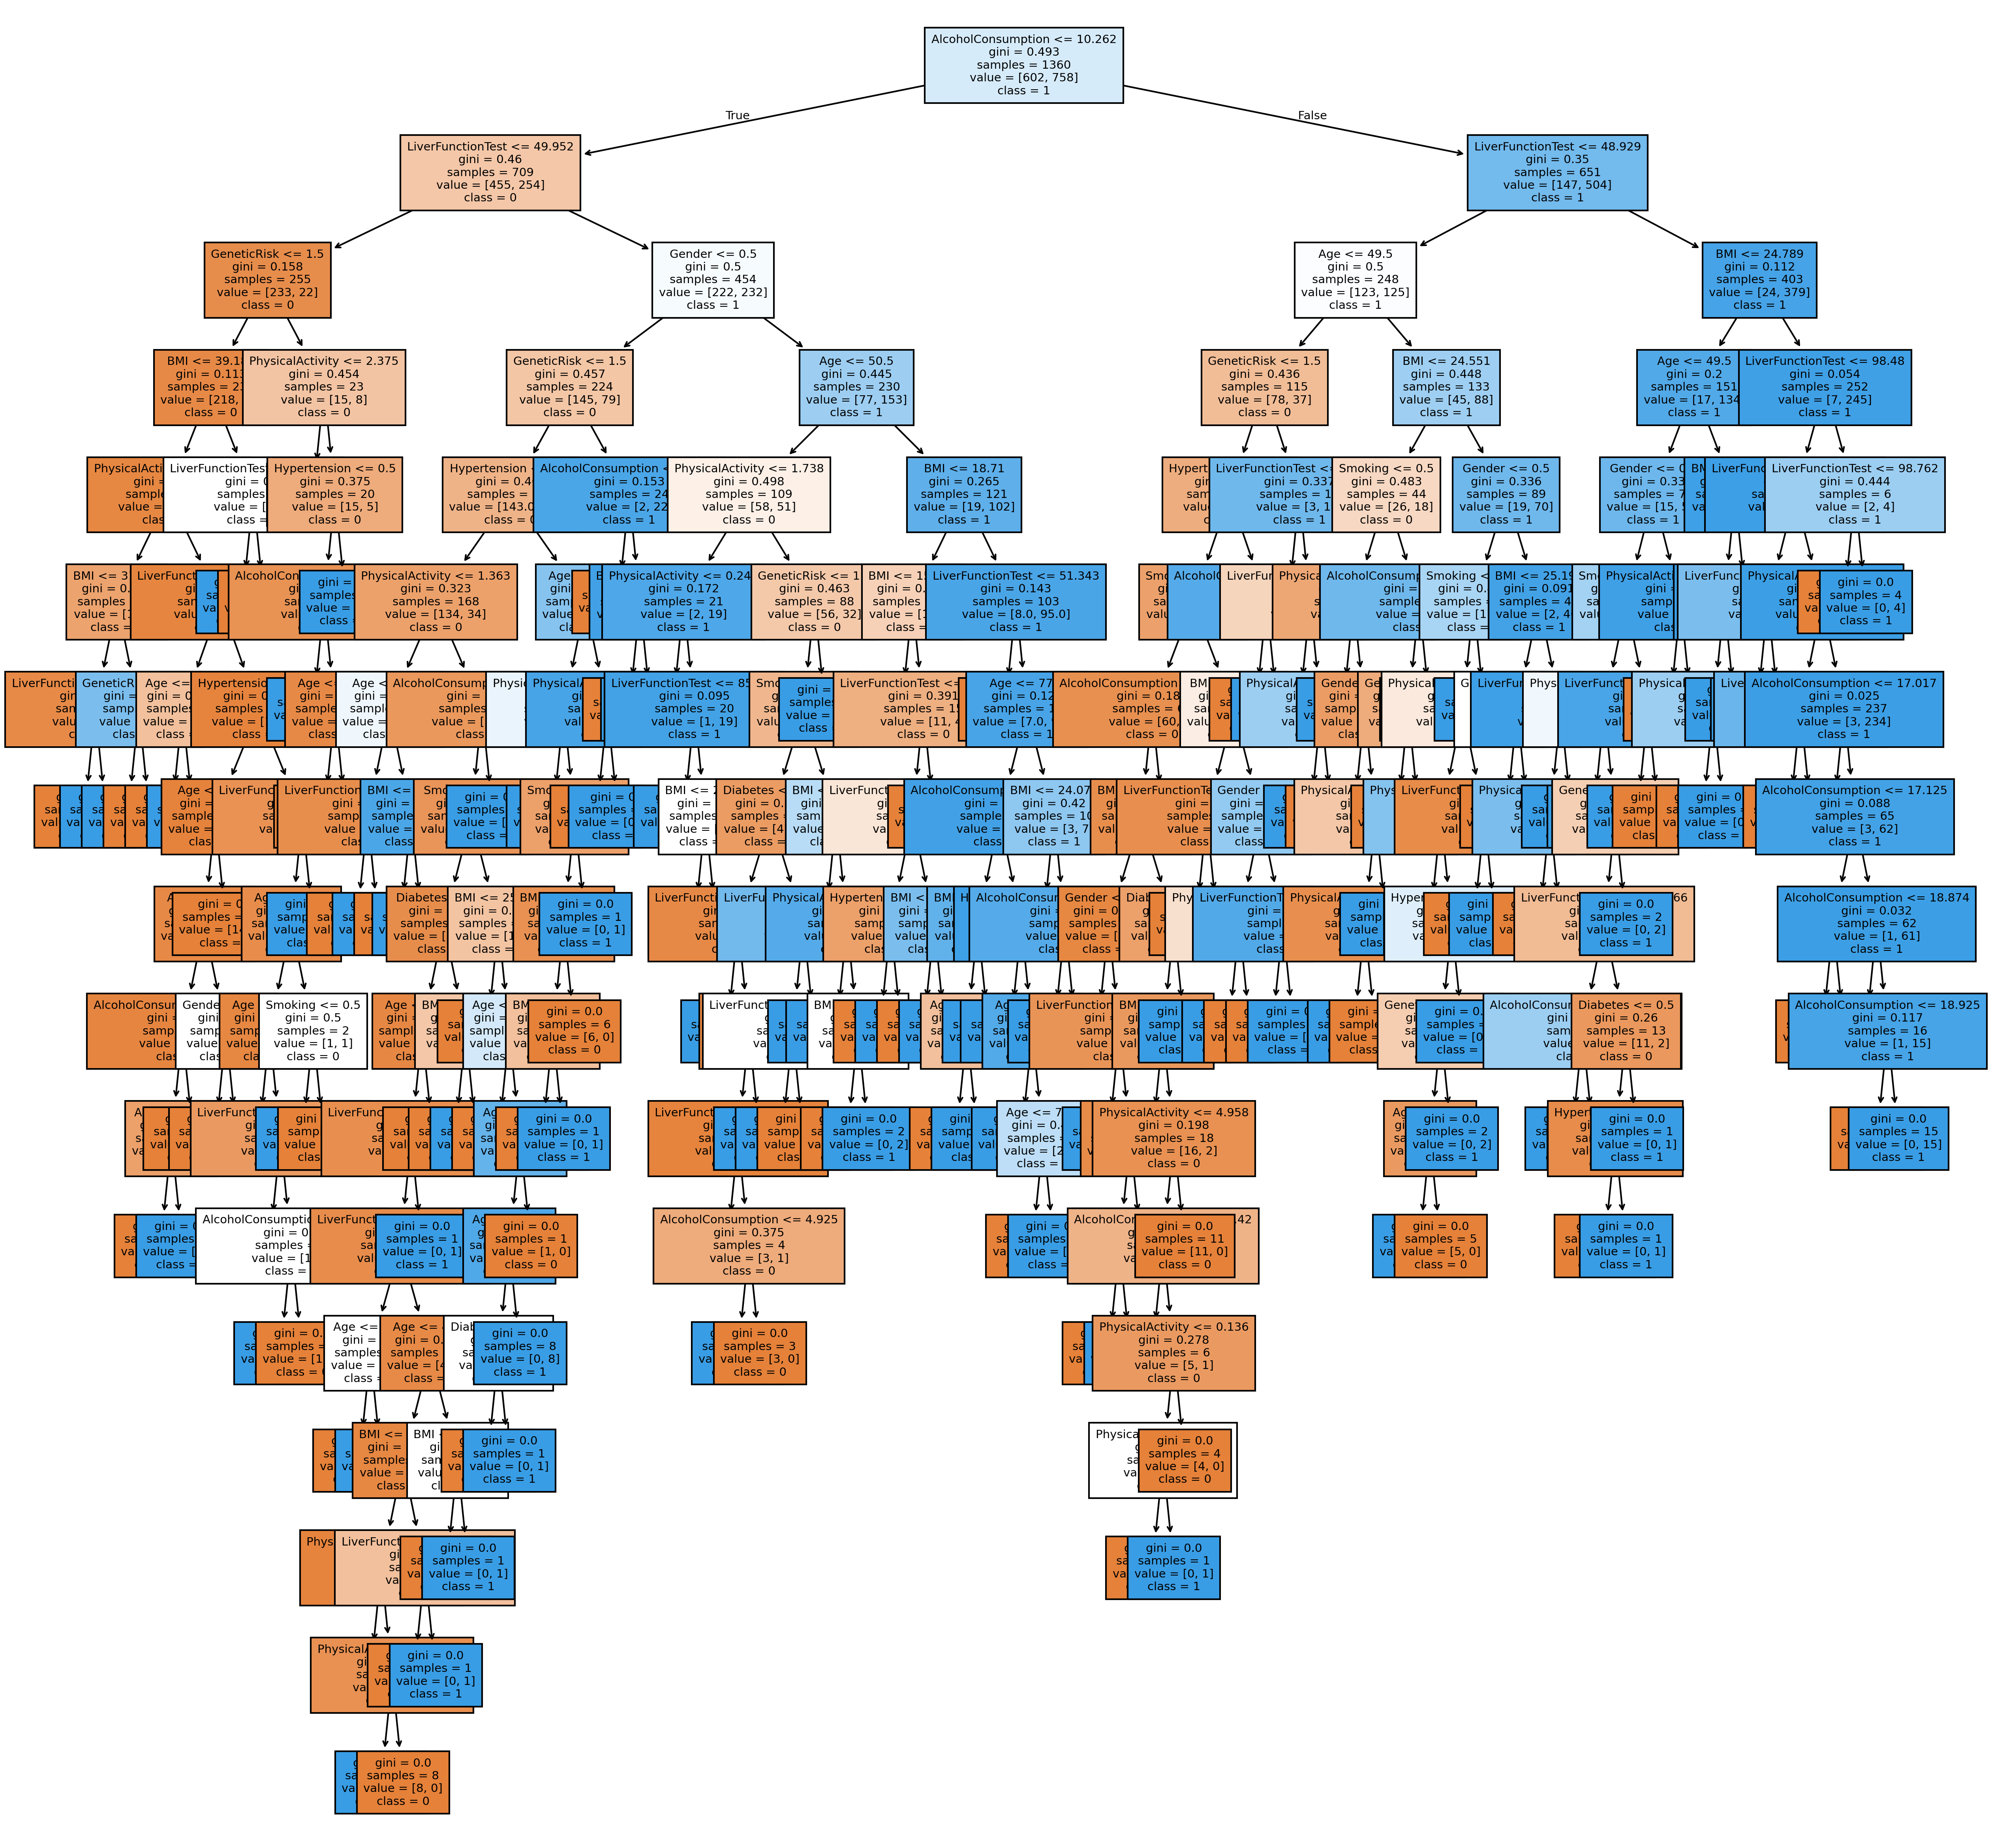

In [44]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20),dpi=300)
plot_tree(dt,filled=True,feature_names=['Age', 'Gender', 'BMI', 'AlcoholConsumption', 'Smoking', 'GeneticRisk',
       'PhysicalActivity', 'Diabetes', 'Hypertension', 'LiverFunctionTest'],class_names=['0', '1'],fontsize=7)
plt.show()

In [45]:
ypred_train = dt.predict(X_train)
print("TRAIN ACCURACY ",accuracy_score(y_train,ypred_train))
print("THE CV SCORE(accuracy  of model)",cross_val_score(dt,X_train,y_train,cv=5,scoring="accuracy").mean())
ypred_test= dt.predict(X_test)
print("TEST ACCURACY ",accuracy_score(y_test,ypred_test))

TRAIN ACCURACY  1.0
THE CV SCORE(accuracy  of model) 0.8279411764705884
TEST ACCURACY  0.8382352941176471


##### In this data set there is  Overfitting problem,then cut the tree using pruning which was given below

In [46]:
estimator=DecisionTreeClassifier(random_state=42)
#params(which u want to tune and identify the best)
param_grid={"criterion":["gini","entropy"],"max_depth":[1,2,3,4,5,6]}
grid=GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)     
grid.fit(X_train,y_train)
grid.best_params_

{'criterion': 'gini', 'max_depth': 6}

In [47]:
#best model
grid.best_estimator_

DecisionTreeClassifier(max_depth=6, random_state=42)

##### After creating decision tree model ,using decision tree we can identify the important features 

In [48]:
grid.best_estimator_.feature_importances_

array([0.08041216, 0.06525154, 0.07028968, 0.2689609 , 0.04288555,
       0.07475267, 0.05941657, 0.        , 0.05394475, 0.28408618])

In [49]:
s1=pd.DataFrame(index=X.columns,data=dt.feature_importances_,columns=["Feature Importance"])
s1

,Feature Importance
Age,0.102726
Gender,0.054350
BMI,0.110505
AlcoholConsumption,0.216515
Smoking,0.046592
GeneticRisk,0.060840
PhysicalActivity,0.096221
Diabetes,0.020850
Hypertension,0.046134
LiverFunctionTest,0.245267


In [50]:
# Identify the important features 
imp_columns=s1[s1["Feature Importance"] > 0].index.tolist()
imp_columns

['Age',
 'Gender',
 'BMI',
 'AlcoholConsumption',
 'Smoking',
 'GeneticRisk',
 'PhysicalActivity',
 'Diabetes',
 'Hypertension',
 'LiverFunctionTest']

### FINAL DECISION TREE  MODEL 
###### with best params and important columns 

In [51]:
X_imp=X[imp_columns]
X_train,X_test,y_train,y_test = train_test_split(X_imp,y,train_size=0.8,random_state=42)
fdt=DecisionTreeClassifier(criterion='gini',max_depth=6,random_state=16)
fdt.fit(X_train,y_train)  
ypred_train = fdt.predict(X_train)
print("TRAIN ACCURACY ",accuracy_score(y_train,ypred_train))
print("THE CV SCORE(accuracy  of model)",cross_val_score(fdt,X_train,y_train,cv=5,scoring="accuracy").mean())
ypred_test= fdt.predict(X_test)
print("TEST ACCURACY ",accuracy_score(y_test,ypred_test))          

TRAIN ACCURACY  0.8911764705882353
THE CV SCORE(accuracy  of model) 0.8301470588235293
TEST ACCURACY  0.8147058823529412


📘 Classification Report — dt_Model (Train)
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       602
           1       0.93      0.87      0.90       758

    accuracy                           0.89      1360
   macro avg       0.89      0.89      0.89      1360
weighted avg       0.89      0.89      0.89      1360

📘 Classification Report — dt_Model (Test)
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       162
           1       0.84      0.79      0.82       178

    accuracy                           0.81       340
   macro avg       0.82      0.82      0.81       340
weighted avg       0.82      0.81      0.81       340



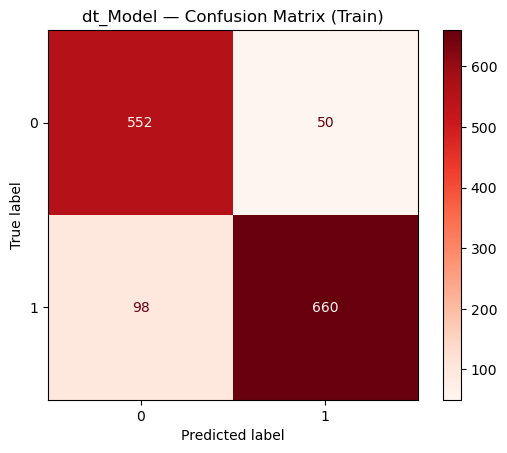

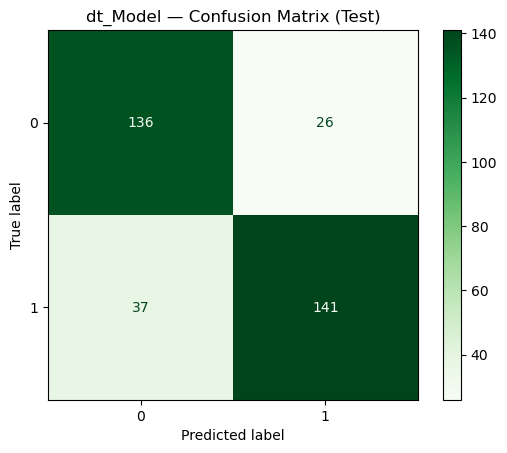

In [52]:
dt_Model_Report = model_performance('dt_Model', fdt, X_train, y_train, X_test, y_test, analysis_df)

## ***RANDOM FOREST***

#### <U> Modelling</U>

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)   

RandomForestClassifier(random_state=42)

######  FIRST TRY WITHDEFAULT PARAMS 

In [54]:
ypred_train = rf.predict(X_train)
print("TRAIN ACCURACY ",accuracy_score(y_train,ypred_train))
print("THE CV SCORE(accuracy  of model)",cross_val_score(rf,X_train,y_train,cv=5,scoring="accuracy").mean())
ypred_test= rf.predict(X_test)
print("TEST ACCURACY ",accuracy_score(y_test,ypred_test))

TRAIN ACCURACY  1.0
THE CV SCORE(accuracy  of model) 0.8830882352941177
TEST ACCURACY  0.8970588235294118


##### control overfitting in Random Forest by limiting tree growth:

In [55]:
estimator=RandomForestClassifier(random_state=42)
param_grid={'n_estimators' : list(range(1,50))}
grid=GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)        
grid.fit(X_train,y_train)
grid.best_params_

{'n_estimators': 42}

In [56]:
#best model
grid.best_estimator_

RandomForestClassifier(n_estimators=42, random_state=42)

##### After creating random forest model we can identify the important features 

In [57]:
grid.best_estimator_.feature_importances_

array([0.11103888, 0.04173825, 0.12193691, 0.2468388 , 0.04150948,
       0.04347761, 0.10299076, 0.01812926, 0.036712  , 0.23562806])

In [58]:
s2=pd.DataFrame(index=X.columns,data=rf.feature_importances_,columns=["Feature Importance"])
s2

,Feature Importance
Age,0.110756
Gender,0.043063
BMI,0.117660
AlcoholConsumption,0.250244
Smoking,0.041516
GeneticRisk,0.045610
PhysicalActivity,0.103177
Diabetes,0.018408
Hypertension,0.033062
LiverFunctionTest,0.236504


In [59]:
# Identify the important features 
imp_columns=s2[s2["Feature Importance"] > 0].index.tolist()
imp_columns

['Age',
 'Gender',
 'BMI',
 'AlcoholConsumption',
 'Smoking',
 'GeneticRisk',
 'PhysicalActivity',
 'Diabetes',
 'Hypertension',
 'LiverFunctionTest']

### FINAL RANDOM FOREST MODEL 
###### with best params and important columns 

In [60]:
X_imp=X[imp_columns]
X_train,X_test,y_train,y_test = train_test_split(X_imp,y,train_size=0.8,random_state=42)
frf=RandomForestClassifier(n_estimators=44,random_state=16)
frf.fit(X_train,y_train)  
ypred_train = frf.predict(X_train)
print("TRAIN ACCURACY ",accuracy_score(y_train,ypred_train))
print("THE CV SCORE(accuracy  of model)",cross_val_score(frf,X_train,y_train,cv=5,scoring="accuracy").mean())
ypred_test= frf.predict(X_test)
print("TEST ACCURACY ",accuracy_score(y_test,ypred_test))          

TRAIN ACCURACY  0.9992647058823529
THE CV SCORE(accuracy  of model) 0.8801470588235294
TEST ACCURACY  0.8852941176470588


📘 Classification Report — rf_Model (Train)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       602
           1       1.00      1.00      1.00       758

    accuracy                           1.00      1360
   macro avg       1.00      1.00      1.00      1360
weighted avg       1.00      1.00      1.00      1360

📘 Classification Report — rf_Model (Test)
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       162
           1       0.87      0.92      0.89       178

    accuracy                           0.89       340
   macro avg       0.89      0.88      0.88       340
weighted avg       0.89      0.89      0.88       340



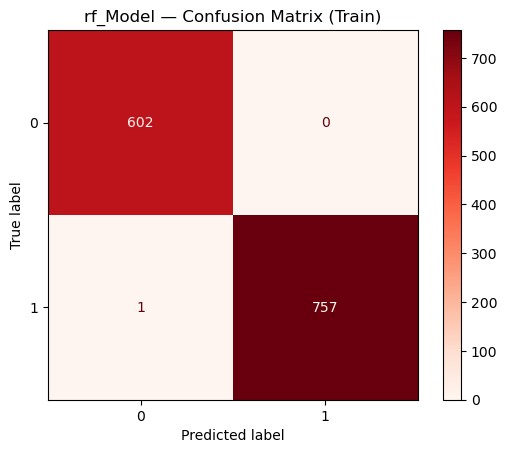

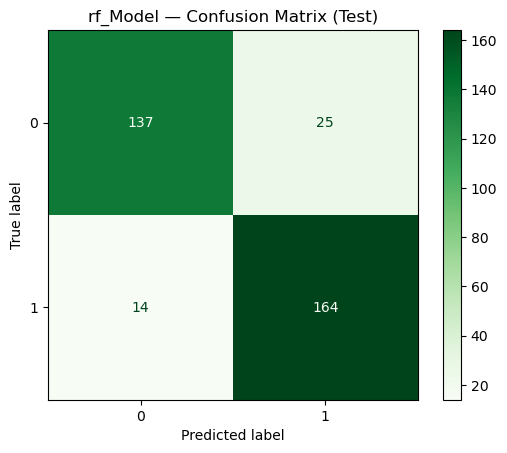

In [61]:
rf_Model_Report = model_performance('rf_Model', frf, X_train, y_train, X_test, y_test, analysis_df)

# ADA BOOST 

In [62]:
from sklearn.ensemble import AdaBoostClassifier
ab=AdaBoostClassifier(random_state=42)
ab.fit(X_train,y_train)       

AdaBoostClassifier(random_state=42)

######  FIRST TRY WITHOUT USING ANY PARAMS 

In [63]:
ypred_train = ab.predict(X_train)
print("TRAIN ACCURACY ",accuracy_score(y_train,ypred_train))
print("THE CV SCORE(accuracy  of model)",cross_val_score(ab,X_train,y_train,cv=5,scoring="accuracy").mean())
ypred_test= ab.predict(X_test)
print("TEST ACCURACY ",accuracy_score(y_test,ypred_test))

TRAIN ACCURACY  0.913235294117647
THE CV SCORE(accuracy  of model) 0.8985294117647058
TEST ACCURACY  0.8823529411764706


#### ADA BOOST>>> apply the HPT for identifying the best params

In [64]:
estimator_ab=AdaBoostClassifier(random_state=42)
#params(which u want to tune and identify the best)     
param_grid_ab={"n_estimators":list(range(1,51))}  # click on shift tab(why 51 taken)                     
grid=GridSearchCV(estimator_ab,param_grid_ab,scoring="accuracy",cv=5)         
grid.fit(X_train,y_train)
grid.best_params_

{'n_estimators': 20}

In [65]:
grid.best_estimator_

AdaBoostClassifier(n_estimators=20, random_state=42)

In [66]:
grid.best_estimator_.feature_importances_

array([0.07196479, 0.06192163, 0.07273424, 0.19698819, 0.08619346,
       0.08734884, 0.11936994, 0.05460205, 0.07289982, 0.17597704])

In [67]:
s3=pd.DataFrame(index=X.columns,data=ab.feature_importances_,columns=["Feature Importance"])
s3

,Feature Importance
Age,0.076920
Gender,0.043030
BMI,0.097278
AlcoholConsumption,0.169369
Smoking,0.069897
GeneticRisk,0.088627
PhysicalActivity,0.130709
Diabetes,0.057642
Hypertension,0.059329
LiverFunctionTest,0.207196


In [68]:
# Identify the important features 
imp_columns=s3[s3["Feature Importance"] > 0].index.tolist()
imp_columns

['Age',
 'Gender',
 'BMI',
 'AlcoholConsumption',
 'Smoking',
 'GeneticRisk',
 'PhysicalActivity',
 'Diabetes',
 'Hypertension',
 'LiverFunctionTest']

### Final Adaboost model with best hyperparameter and important columns 

In [69]:
X_imp=X[imp_columns]
X_train,X_test,y_train,y_test = train_test_split(X_imp,y,train_size=0.8,random_state=42)
fab=AdaBoostClassifier(n_estimators=12)
fab.fit(X_train,y_train)  
ypred_train = fab.predict(X_train)
print("TRAIN ACCURACY ",accuracy_score(y_train,ypred_train))
print("THE CV SCORE(accuracy  of model)",cross_val_score(fab,X_train,y_train,cv=5,scoring="accuracy").mean())
ypred_test= fab.predict(X_test)
print("TEST ACCURACY ",accuracy_score(y_test,ypred_test))          

TRAIN ACCURACY  0.8948529411764706
THE CV SCORE(accuracy  of model) 0.8948529411764706
TEST ACCURACY  0.8794117647058823


📘 Classification Report — ada_Model (Train)
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       602
           1       0.93      0.88      0.90       758

    accuracy                           0.89      1360
   macro avg       0.89      0.90      0.89      1360
weighted avg       0.90      0.89      0.90      1360

📘 Classification Report — ada_Model (Test)
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       162
           1       0.87      0.90      0.89       178

    accuracy                           0.88       340
   macro avg       0.88      0.88      0.88       340
weighted avg       0.88      0.88      0.88       340



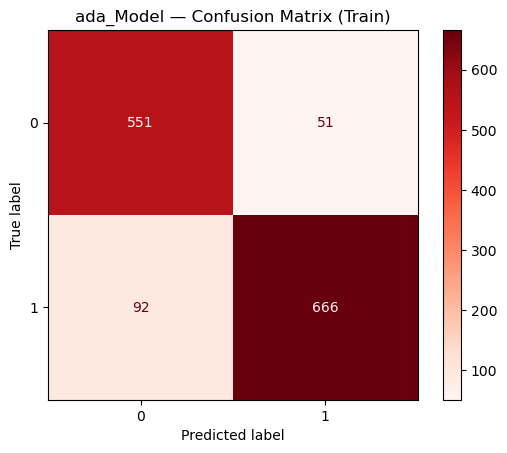

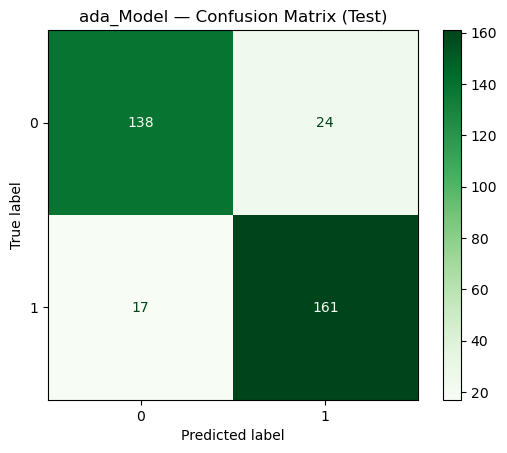

In [70]:
ada_Model_Report = model_performance('ada_Model', fab, X_train, y_train, X_test, y_test, analysis_df)

## GRADIENT BOOST 

In [71]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(random_state=42)
gb.fit(X_train,y_train)       

GradientBoostingClassifier(random_state=42)

######  FIRST TRY WITHOUT USING ANY PARAMS 

In [72]:
ypred_train = gb.predict(X_train)
print("TRAIN ACCURACY ",accuracy_score(y_train,ypred_train))
print("THE CV SCORE(accuracy  of model)",cross_val_score(gb,X_train,y_train,cv=5,scoring="accuracy").mean())
ypred_test= gb.predict(X_test)
print("TEST ACCURACY ",accuracy_score(y_test,ypred_test))

TRAIN ACCURACY  0.9580882352941177
THE CV SCORE(accuracy  of model) 0.8948529411764706
TEST ACCURACY  0.9088235294117647


#### GRADIENT BOOST>>> apply the HPT for identifying the best params

In [73]:
estimator_gb=GradientBoostingClassifier(random_state=42)
#params(which u want to tune and identify the best)     
param_grid_gb={"n_estimators":list(range(1,11))
              ,"learning_rate":[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}                  
grid=GridSearchCV(estimator_gb,param_grid_gb,scoring="accuracy",cv=5)         
grid.fit(X_train,y_train)
grid.best_params_

{'learning_rate': 0.7, 'n_estimators': 10}

In [74]:
grid.best_estimator_

GradientBoostingClassifier(learning_rate=0.7, n_estimators=10, random_state=42)

In [75]:
grid.best_estimator_.feature_importances_

array([0.079026  , 0.06257073, 0.05550812, 0.30865613, 0.05807993,
       0.05049461, 0.05510406, 0.01631264, 0.03211812, 0.28212965])

In [76]:
s4=pd.DataFrame(index=X.columns,data=gb.feature_importances_,columns=["Feature Importance"])
s4

,Feature Importance
Age,0.080347
Gender,0.055993
BMI,0.071782
AlcoholConsumption,0.285440
Smoking,0.060968
GeneticRisk,0.057492
PhysicalActivity,0.062827
Diabetes,0.016049
Hypertension,0.033730
LiverFunctionTest,0.275373


In [77]:
imp_columns=s4[s4["Feature Importance"] > 0].index.tolist()
imp_columns

['Age',
 'Gender',
 'BMI',
 'AlcoholConsumption',
 'Smoking',
 'GeneticRisk',
 'PhysicalActivity',
 'Diabetes',
 'Hypertension',
 'LiverFunctionTest']

### Final Gradientboost model with best hyperparameter and important columns 

In [78]:
X_imp=X[imp_columns]
X_train,X_test,y_train,y_test = train_test_split(X_imp,y,train_size=0.8,random_state=42)
fgb=GradientBoostingClassifier(n_estimators=10,learning_rate=0.7)
fgb.fit(X_train,y_train)  
ypred_train = fgb.predict(X_train)
print("TRAIN ACCURACY ",accuracy_score(y_train,ypred_train))
print("THE CV SCORE(accuracy  of model)",cross_val_score(fgb,X_train,y_train,cv=5,scoring="accuracy").mean())
ypred_test= fgb.predict(X_test)
print("TEST ACCURACY ",accuracy_score(y_test,ypred_test))          

TRAIN ACCURACY  0.9463235294117647
THE CV SCORE(accuracy  of model) 0.8963235294117649
TEST ACCURACY  0.9205882352941176


📘 Classification Report — gb_Model (Train)
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       602
           1       0.94      0.96      0.95       758

    accuracy                           0.95      1360
   macro avg       0.95      0.94      0.95      1360
weighted avg       0.95      0.95      0.95      1360

📘 Classification Report — gb_Model (Test)
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       162
           1       0.90      0.96      0.93       178

    accuracy                           0.92       340
   macro avg       0.92      0.92      0.92       340
weighted avg       0.92      0.92      0.92       340



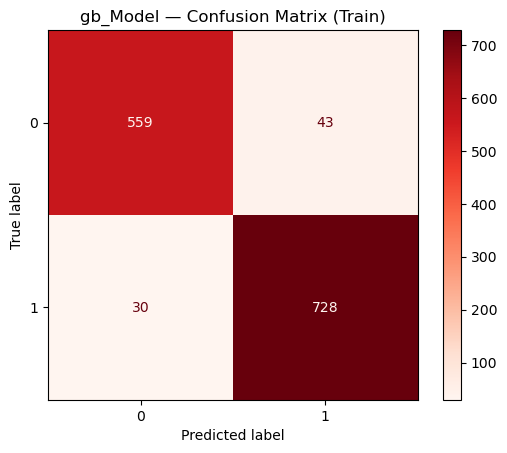

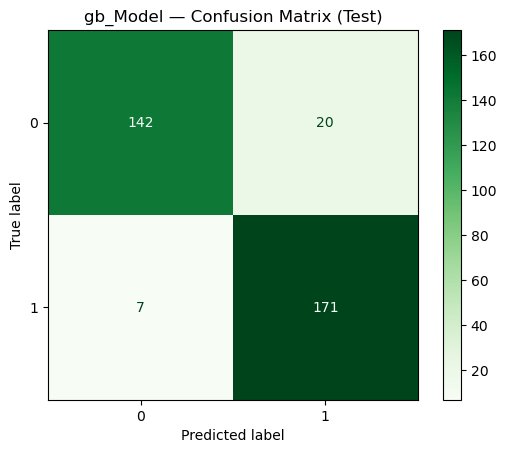

In [79]:
gb_Model_Report = model_performance('gb_Model', fgb, X_train, y_train, X_test, y_test, analysis_df)

# EXTREME GRADIENTBOOSTING(XGBOOST)

In [80]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [81]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42)  
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

######  FIRST TRY WITHOUT USING ANY PARAMS 

In [82]:
ypred_train = xgb.predict(X_train)
print("TRAIN ACCURACY ",accuracy_score(y_train,ypred_train))
print("THE CV SCORE(accuracy  of model)",cross_val_score(xgb,X_train,y_train,cv=5,scoring="accuracy").mean())
ypred_test= xgb.predict(X_test)
print("TEST ACCURACY ",accuracy_score(y_test,ypred_test))

TRAIN ACCURACY  1.0
THE CV SCORE(accuracy  of model) 0.8875
TEST ACCURACY  0.8911764705882353


####  EXTREME GRADIENT BOOST>>> apply the HPT for identifying the best params

In [83]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
estimator_xgb = XGBClassifier()  
param_grid_xgb = {
    "n_estimators": list(range(1, 11)),
    "learning_rate": [0, 0.1, 0.5, 1.0],
    "max_depth": [3, 4, 5],
    "gamma": [0, 0.15, 0.3, 0.5]
}
grid = GridSearchCV(estimator_xgb, param_grid_xgb, scoring="accuracy", cv=5)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)

Best Parameters: {'gamma': 0.5, 'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 10}


In [84]:
grid.best_estimator_.feature_importances_

array([0.07172662, 0.11594246, 0.05710015, 0.17327702, 0.13394944,
       0.07379384, 0.07595403, 0.08205438, 0.07880992, 0.13739216],
      dtype=float32)

In [85]:
grid.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.5, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.5, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=10,
              n_jobs=None, num_parallel_tree=None, ...)

In [86]:
s4=pd.DataFrame(index=X.columns,data=xgb.feature_importances_,columns=["Feature Importance"])
s4

,Feature Importance
Age,0.067436
Gender,0.108262
BMI,0.049956
AlcoholConsumption,0.109963
Smoking,0.172660
GeneticRisk,0.117945
PhysicalActivity,0.049063
Diabetes,0.083409
Hypertension,0.145937
LiverFunctionTest,0.095369


In [87]:
imp_columns=s4[s4["Feature Importance"] > 0].index.tolist()
imp_columns

['Age',
 'Gender',
 'BMI',
 'AlcoholConsumption',
 'Smoking',
 'GeneticRisk',
 'PhysicalActivity',
 'Diabetes',
 'Hypertension',
 'LiverFunctionTest']

### Final ExtremeGradientboost model with best hyperparameter and important columns 

In [88]:
X_imp=X[imp_columns]
X_train,X_test,y_train,y_test = train_test_split(X_imp,y,train_size=0.8,random_state=16)
fxgb=XGBClassifier(n_estimators=10,learning_rate=0.5,max_depth=3,gamma=0.5)
fxgb.fit(X_train,y_train)  
ypred_train = fxgb.predict(X_train)
print("TRAIN ACCURACY ",accuracy_score(y_train,ypred_train))
print("THE CV SCORE(accuracy  of model)",cross_val_score(fxgb,X_train,y_train,cv=5,scoring="accuracy").mean())
ypred_test= fxgb.predict(X_test)
print("TEST ACCURACY ",accuracy_score(y_test,ypred_test))          

TRAIN ACCURACY  0.9345588235294118
THE CV SCORE(accuracy  of model) 0.9007352941176471
TEST ACCURACY  0.8941176470588236


📘 Classification Report — xg_Model (Train)
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       618
           1       0.94      0.94      0.94       742

    accuracy                           0.93      1360
   macro avg       0.93      0.93      0.93      1360
weighted avg       0.93      0.93      0.93      1360

📘 Classification Report — xg_Model (Test)
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       146
           1       0.92      0.90      0.91       194

    accuracy                           0.89       340
   macro avg       0.89      0.89      0.89       340
weighted avg       0.89      0.89      0.89       340



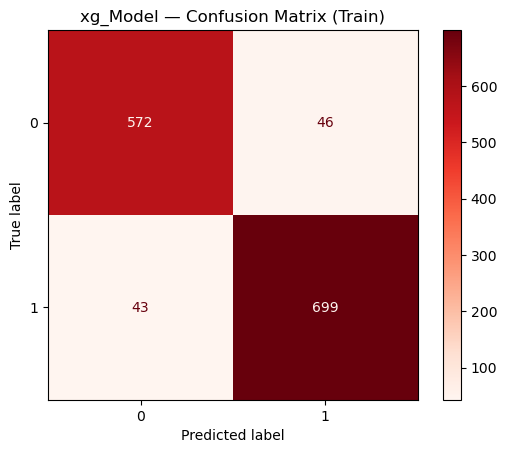

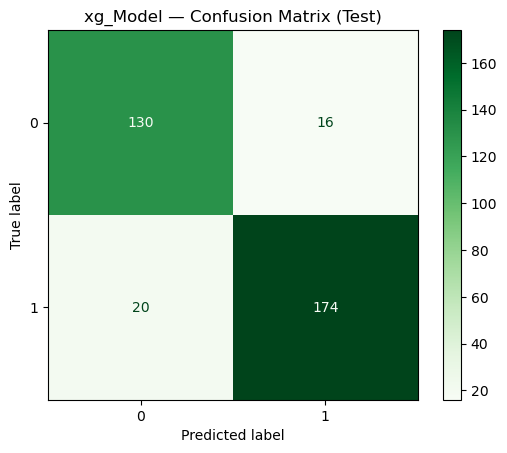

In [89]:
xg_Model_Report = model_performance('xg_Model', fxgb, X_train, y_train, X_test, y_test, analysis_df)

In [90]:
analysis_df

,TrainAccuracy,TestAccuracy,TrainPrecision,TestPrecision,TrainRecall,TestRecall,TrainF1,TestF1,CV
logistic_Model,0.832353,0.808824,0.841495,0.795812,0.861478,0.853933,0.851369,0.823848,0.828676
knn_Model,0.880147,0.805882,0.913769,0.829412,0.866755,0.792135,0.889641,0.810345,0.819118
svm_Model,0.885294,0.882353,0.890909,0.85567,0.905013,0.932584,0.897906,0.892473,0.852206
dt_Model,0.891176,0.814706,0.929577,0.844311,0.870712,0.792135,0.899183,0.817391,0.830147
rf_Model,0.999265,0.885294,1.0,0.867725,0.998681,0.921348,0.99934,0.893733,0.880147
ada_Model,0.894853,0.879412,0.92887,0.87027,0.878628,0.904494,0.903051,0.887052,0.894853
gb_Model,0.946324,0.920588,0.944228,0.895288,0.960422,0.960674,0.952256,0.926829,0.896324
xg_Model,0.934559,0.894118,0.938255,0.915789,0.942049,0.896907,0.940148,0.90625,0.900735


### ***Here The best model is Gradient boost***

In [91]:
from sklearn.ensemble import GradientBoostingClassifier
gb_Model=GradientBoostingClassifier(random_state=42)
gb_Model.fit(X_train,y_train)       

GradientBoostingClassifier(random_state=42)

### Save The Model

In [92]:
import joblib
# After training your model
joblib.dump(gb_Model, 'gboost_model.pkl')

['gboost_model.pkl']

In [93]:
import joblib
# After training your model
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

# Steps to be followed after saving the model 

##### step1:Load the Model and Scaler

In [94]:
import joblib
gb_Model = joblib.load('gboost_model.pkl')   # your saved model
scaler = joblib.load('scaler.pkl')            # your saved scaler

##### Step 2: Accept New Data ( through user input)

In [95]:
Age = int(input('Enter Age of the Patient (20 to 80): '))
Gender = int(input('Enter Gender (0 for Male, 1 for Female): '))
BMI = float(input('Enter BMI (e.g., 15 to 40): '))
AlcoholConsumption = float(input('Enter Alcohol Consumption per week (units): '))
Smoking = int(input('Does the patient smoke? (0 = No, 1 = Yes): '))
GeneticRisk = int(input('Enter Genetic Risk (0 = Low, 1 = Medium, 2 = High): '))
PhysicalActivity = float(input('Enter Hours of Physical Activity per week (0 to 10): '))
Diabetes = int(input('Does the patient have Diabetes? (0 = No, 1 = Yes): '))
Hypertension = int(input('Does the patient have Hypertension? (0 = No, 1 = Yes): '))
LiverFunctionTest = float(input('Enter Liver Function Test Score (20 to 100): '))

columns_to_scale = np.array([[Age, BMI, AlcoholConsumption, GeneticRisk, PhysicalActivity, LiverFunctionTest]])

scaled_columns = scaler.transform(columns_to_scale)

Enter Age of the Patient (20 to 80):  22
Enter Gender (0 for Male, 1 for Female):  1
Enter BMI (e.g., 15 to 40):  9
Enter Alcohol Consumption per week (units):  2
Does the patient smoke? (0 = No, 1 = Yes):  1
Enter Genetic Risk (0 = Low, 1 = Medium, 2 = High):  1
Enter Hours of Physical Activity per week (0 to 10):  4
Does the patient have Diabetes? (0 = No, 1 = Yes):  1
Does the patient have Hypertension? (0 = No, 1 = Yes):  1
Enter Liver Function Test Score (20 to 100):  45


##### Step 3: Scale the New Data (only the scaled columns)

In [96]:
#-------------A 2D Array containing scaled values of the variables
print(scaled_columns) 
# Age, BMI.....................LiverFunctionTest

[[-1.6229822  -2.59317448 -1.35243455  0.72550143 -0.35591491 -0.64994161]]


In [97]:
Age_scaled = scaled_columns[0][0] 
BMI_scaled = scaled_columns[0][1]
AlcoholConsumption_scaled = scaled_columns[0][2]
GeneticRisk_scaled = scaled_columns[0][3]
PhysicalActivity_scaled = scaled_columns[0][4]
LiverFunctionTest_scaled = scaled_columns[0][5]

In [98]:
input_from_customer = [Age_scaled, Gender, BMI_scaled, AlcoholConsumption_scaled, Smoking, GeneticRisk_scaled,PhysicalActivity_scaled,Diabetes, Hypertension,LiverFunctionTest_scaled]

In [99]:
input_array = np.array([input_from_customer])

##### Step 4: Make Predictions

In [100]:
pred = gb_Model.predict(input_array)
if pred[0] == 1:
    print("Liver Disease Detected")
else:
    print("No Liver Disease")

No Liver Disease


##  Conclusion

We created a machine learning model to predict liver disease using patient data like age, BMI, alcohol consumption, and health indicators.

After testing 8 different models, **Gradient Boosting** gave the best performance with:

- **Test Accuracy:** 92.06%  
- **Test Recall:** 96.07%  
- **Test F1-Score:** 92.68%  

It was the most balanced and reliable model, especially suitable for medical use cases where recall is important.

---

## What We Did

- Selected important clinical and lifestyle features  
- Applied feature scaling on continuous variables  
- Trained 8 classification models and compared performance  
- Selected and saved the best model (`Gradient Boosting`)  
- Took user input to predict on new patient data  
- Displayed both prediction and probability

---

## Use of This Project

This liver disease prediction system can help with:

-  **Early detection** of liver disease in patients  
-  Use by doctors and hospitals as a **decision support tool**  
-  Integration into **health apps** for quick risk checking  
-  Use by individuals for **basic self-assessment**

---

  This project shows how machine learning can support healthcare by providing fast, data-driven insights for better outcomes.